# Phase 1

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM,LeakyReLU
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import tensorflow as tf
import random
random.seed(0)
from keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
# fix random seed for reproducibility
tf.random.set_seed(25)

In [3]:
df1 = pd.read_csv(r"C:\Users\vella\Desktop\Praju\College\Projects\Final year\Data\Tesla\stock_yfinance_data.csv")
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [4]:
df1.rename(columns = {'Stock Name':'Stock_Name'}, inplace = True)

In [5]:
names = ['TSLA']
df1 = df1[df1.Stock_Name.isin(names)]

In [6]:
df1

,Date,Open,High,Low,Close,Adj Close,Volume,Stock_Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA
...,...,...,...,...,...,...,...,...
247,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63748400,TSLA
248,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,TSLA
249,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,TSLA
250,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800,TSLA


In [7]:
df2 = df1.iloc[:,[0,4]]
df2.head()

,Date,Close
0,2021-09-30,258.493347
1,2021-10-01,258.406677
2,2021-10-04,260.510010
3,2021-10-05,260.196655
4,2021-10-06,260.916656


In [8]:
#Converting dates as datetime format
df2.Date = pd.to_datetime(df2.Date)

C:\Users\vella\AppData\Local\Temp\ipykernel_15504\1509892825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Date = pd.to_datetime(df2.Date)


In [9]:
#Converting date column as index
df3 = df2.set_index("Date")

In [10]:
df3

,Close
Date,
2021-09-30,258.493347
2021-10-01,258.406677
2021-10-04,260.510010
2021-10-05,260.196655
2021-10-06,260.916656
...,...
2022-09-23,275.329987
2022-09-26,276.010010
2022-09-27,282.940002


# Actual Prediction

In [11]:
#Create a dataframe with only the 'Create Column
data= df3
#convert the dataframe to a numpy array
dataset= data.values
#get the number of rows to train the model on
training_data_len= math.ceil(len(dataset)* 0.85)
training_data_len

215

In [12]:
#Scale the all of the data to be values between 0 and 1 
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data

array([[0.24481932],
       [0.24438723],
       [0.25487331],
       [0.25331109],
       [0.25690063],
       [0.27494812],
       [0.261454  ],
       [0.27217286],
       [0.29507268],
       [0.30397996],
       [0.31601167],
       [0.35707522],
       [0.40207733],
       [0.39237221],
       [0.39491484],
       [0.44177813],
       [0.4678354 ],
       [0.65924383],
       [0.64855829],
       [0.68084754],
       [0.74595763],
       [0.80737852],
       [0.96457004],
       [0.90376396],
       [0.97332776],
       [1.        ],
       [0.98700461],
       [0.88870793],
       [0.65698373],
       [0.73085169],
       [0.72347316],
       [0.67346901],
       [0.64018276],
       [0.70888238],
       [0.76584956],
       [0.77809716],
       [0.84569998],
       [0.87862062],
       [0.79911922],
       [0.81070211],
       [0.75406736],
       [0.84558374],
       [0.85849606],
       [0.77580389],
       [0.75852093],
       [0.64280846],
       [0.63290403],
       [0.703

In [13]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(67,len(train_data)):
    x_train.append(train_data[i-67:i,0])
    y_train.append(train_data[i,0])

    if i<=67:
      print(x_train)
      print(y_train)
      print()

[array([0.24481932, 0.24438723, 0.25487331, 0.25331109, 0.25690063,
       0.27494812, 0.261454  , 0.27217286, 0.29507268, 0.30397996,
       0.31601167, 0.35707522, 0.40207733, 0.39237221, 0.39491484,
       0.44177813, 0.4678354 , 0.65924383, 0.64855829, 0.68084754,
       0.74595763, 0.80737852, 0.96457004, 0.90376396, 0.97332776,
       1.        , 0.98700461, 0.88870793, 0.65698373, 0.73085169,
       0.72347316, 0.67346901, 0.64018276, 0.70888238, 0.76584956,
       0.77809716, 0.84569998, 0.87862062, 0.79911922, 0.81070211,
       0.75406736, 0.84558374, 0.85849606, 0.77580389, 0.75852093,
       0.64280846, 0.63290403, 0.70393024, 0.73253014, 0.62424596,
       0.64623186, 0.56211045, 0.54898208, 0.57803066, 0.4964852 ,
       0.50587448, 0.45164939, 0.51577891, 0.6326714 , 0.72927289,
       0.77404237, 0.76495221, 0.76116321, 0.73482341, 0.71228919,
       0.94992936, 0.86652258])]
[0.7643705656163826]



In [14]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(148, 67, 1)

In [16]:
#Build the LSTM network model
model = Sequential()

n_input = 1
n_features = 1
    
model.add(LeakyReLU(alpha = 0.05))
model.add(LSTM(50, input_shape=(n_input, n_features)))
#model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=75))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

#model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
#model.add(LSTM(units=50, return_sequences=False))
#model.add(Dense(units=25))
#model.add(Dense(units=1))

In [17]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

148/148 [==============================] - 3s 10ms/step - loss: 0.0161


In [19]:
#Test data set
test_data = scaled_data[training_data_len - 180: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] 
for i in range(180,len(test_data)):
    x_test.append(test_data[i-67:i,0])

In [20]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [21]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [22]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)
#Undo scaling

2/2 [==============================] - 1s 7ms/step


In [23]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

10.790161195883393

C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3590450730.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


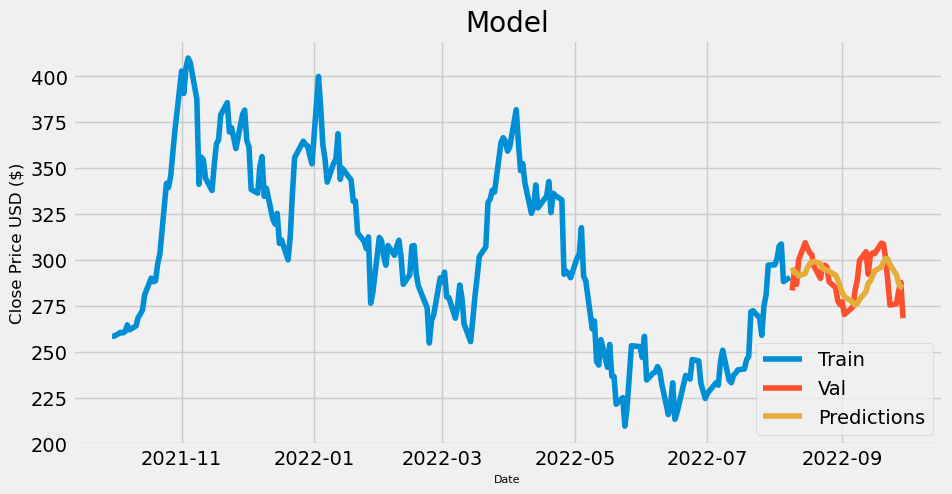

In [24]:
#Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(10,5))
plt.title('Model')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Live Predictions

In [25]:
predicted = pd.DataFrame()
for i in range(0,(len(df3)-67)):
    #Create a new dataframe
    new_df = df3[i:(i+67)]
    #Get the last 180 day closing price 
    last_67_days = new_df[-67:].values
    #Scale the data to be values between 0 and 1
    last_67_days_scaled = scaler.transform(last_67_days)
    #Create an empty list
    X_test = []
    #Append teh past 180 days
    X_test.append(last_67_days_scaled)
    #Convert the X_test data set to a numpy array
    X_test = np.array(X_test)
    #Reshape the data
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    #Get the predicted scaled price
    pred_price = model.predict(X_test)
    #undo the scaling 
    pred_price = scaler.inverse_transform(pred_price)
    df_pred = pd.DataFrame(pred_price)
    print(df_pred)
    predicted = predicted.append(df_pred, ignore_index=True)

1/1 [==============================] - 0s 28ms/step
            0
0  359.103516
1/1 [==============================] - 0s 26ms/step
            0
0  358.563629
1/1 [==============================] - 0s 21ms/step
           0
0  355.85376
1/1 [==============================] - 0s 23ms/step
            0
0  350.493103


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 20ms/step
            0
0  348.075958
1/1 [==============================] - 0s 23ms/step
            0
0  346.537476
1/1 [==============================] - 0s 23ms/step
            0
0  348.322266
1/1 [==============================] - 0s 21ms/step
            0
0  344.409332


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 26ms/step
            0
0  342.330811
1/1 [==============================] - 0s 22ms/step
           0
0  339.32309
1/1 [==============================] - 0s 23ms/step
            0
0  334.350067
1/1 [==============================] - 0s 22ms/step


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

            0
0  330.364716
1/1 [==============================] - 0s 24ms/step
            0
0  323.465179
1/1 [==============================] - 0s 23ms/step
            0
0  316.914459
1/1 [==============================] - 0s 25ms/step
            0
0  310.978882
1/1 [==============================] - ETA: 0s

C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)


1/1 [==============================] - 0s 21ms/step
            0
0  307.837402
1/1 [==============================] - 0s 21ms/step
            0
0  297.801117
1/1 [==============================] - 0s 19ms/step
            0
0  291.031647
1/1 [==============================] - 0s 21ms/step
            0
0  292.591217


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 24ms/step
            0
0  294.065186
1/1 [==============================] - 0s 22ms/step
            0
0  293.723785
1/1 [==============================] - 0s 19ms/step
            0
0  292.604828
1/1 [==============================] - 0s 20ms/step
            0
0  294.254242


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 28ms/step
            0
0  294.659546
1/1 [==============================] - 0s 22ms/step
            0
0  296.173126
1/1 [==============================] - 0s 20ms/step
            0
0  298.257782
1/1 [==============================] - 0s 24ms/step
            0
0  297.999084


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 22ms/step
           0
0  294.48941
1/1 [==============================] - 0s 22ms/step
            0
0  292.739227
1/1 [==============================] - 0s 23ms/step
            0
0  294.828552
1/1 [==============================] - 0s 24ms/step
            0
0  296.734192


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 22ms/step
            0
0  294.851654
1/1 [==============================] - 0s 21ms/step
            0
0  291.831451
1/1 [==============================] - 0s 21ms/step
            0
0  286.784027
1/1 [==============================] - 0s 21ms/step
            0
0  278.523773


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 22ms/step
            0
0  274.548462
1/1 [==============================] - 0s 20ms/step
            0
0  272.262421
1/1 [==============================] - 0s 20ms/step
            0
0  275.087067
1/1 [==============================] - 0s 20ms/step
            0
0  277.233917


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 21ms/step
            0
0  280.259583
1/1 [==============================] - 0s 23ms/step
            0
0  279.843994
1/1 [==============================] - 0s 24ms/step
            0
0  279.421051
1/1 [==============================] - 0s 23ms/step
            0
0  276.639893


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 21ms/step
            0
0  275.824432
1/1 [==============================] - 0s 21ms/step
            0
0  277.778107
1/1 [==============================] - 0s 23ms/step
            0
0  277.941742
1/1 [==============================] - 0s 21ms/step
            0
0  274.931671


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 19ms/step
            0
0  270.352081
1/1 [==============================] - 0s 20ms/step
           0
0  269.25528
1/1 [==============================] - 0s 20ms/step
            0
0  271.314606
1/1 [==============================] - 0s 20ms/step
           0
0  275.42926


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 23ms/step
            0
0  281.347046
1/1 [==============================] - 0s 22ms/step
            0
0  287.342041
1/1 [==============================] - 0s 22ms/step
            0
0  297.547668
1/1 [==============================] - 0s 23ms/step
            0
0  306.144745


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 20ms/step
            0
0  313.968231
1/1 [==============================] - 0s 20ms/step
            0
0  319.746368
1/1 [==============================] - 0s 21ms/step
            0
0  330.082733
1/1 [==============================] - 0s 22ms/step
            0
0  338.756683


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 20ms/step
            0
0  344.901337
1/1 [==============================] - 0s 20ms/step
            0
0  348.116455
1/1 [==============================] - 0s 21ms/step
            0
0  350.657593
1/1 [==============================] - 0s 20ms/step
            0
0  356.725433


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 21ms/step
            0
0  357.331543
1/1 [==============================] - 0s 23ms/step
            0
0  353.889801
1/1 [==============================] - 0s 22ms/step
            0
0  351.418152
1/1 [==============================] - 0s 20ms/step
            0
0  346.830292


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 20ms/step
            0
0  339.216461
1/1 [==============================] - 0s 21ms/step
            0
0  333.624451
1/1 [==============================] - 0s 23ms/step
            0
0  331.751129
1/1 [==============================] - 0s 23ms/step
            0
0  327.723663


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 23ms/step
            0
0  325.927551
1/1 [==============================] - 0s 23ms/step
            0
0  326.452118
1/1 [==============================] - 0s 21ms/step
            0
0  323.388123
1/1 [==============================] - 0s 22ms/step
            0
0  323.250671


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 23ms/step
            0
0  323.101318
1/1 [==============================] - 0s 22ms/step
            0
0  322.598724
1/1 [==============================] - 0s 24ms/step
            0
0  313.402496
1/1 [==============================] - 0s 19ms/step


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

            0
0  306.148163
1/1 [==============================] - 0s 20ms/step
            0
0  300.193634
1/1 [==============================] - 0s 23ms/step
           0
0  295.15033
1/1 [==============================] - 0s 21ms/step
            0
0  293.720642
1/1 [==============================] - 0s 21ms/step
            0
0  293.421906


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 21ms/step
            0
0  296.679962
1/1 [==============================] - 0s 25ms/step
            0
0  293.825592
1/1 [==============================] - 0s 23ms/step
            0
0  290.987793
1/1 [==============================] - 0s 22ms/step


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

            0
0  283.121399
1/1 [==============================] - 0s 23ms/step
            0
0  277.748413
1/1 [==============================] - 0s 23ms/step
            0
0  268.895935
1/1 [==============================] - 0s 20ms/step
            0
0  261.507874
1/1 [==============================] - 0s 25ms/step
            0
0  258.894501


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 24ms/step
            0
0  253.965332
1/1 [==============================] - 0s 20ms/step
            0
0  252.987717
1/1 [==============================] - 0s 20ms/step
            0
0  248.860703
1/1 [==============================] - 0s 20ms/step


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

            0
0  245.768936
1/1 [==============================] - 0s 25ms/step
            0
0  240.320435
1/1 [==============================] - 0s 21ms/step
            0
0  236.977783
1/1 [==============================] - 0s 21ms/step
           0
0  231.26944
1/1 [==============================] - 0s 20ms/step
            0
0  229.126984


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 21ms/step
            0
0  231.229294
1/1 [==============================] - 0s 20ms/step
            0
0  236.967606
1/1 [==============================] - 0s 20ms/step
            0
0  241.721497
1/1 [==============================] - 0s 21ms/step
            0
0  244.352707


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 23ms/step
            0
0  249.000107
1/1 [==============================] - 0s 20ms/step
            0
0  247.542496
1/1 [==============================] - 0s 21ms/step
            0
0  247.061584
1/1 [==============================] - 0s 19ms/step
            0
0  246.746429
1/1 [==============================] - ETA: 0s

C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 20ms/step
            0
0  247.092194
1/1 [==============================] - 0s 25ms/step
            0
0  246.869797
1/1 [==============================] - 0s 20ms/step
            0
0  245.032288
1/1 [==============================] - 0s 22ms/step
            0
0  239.959061


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 23ms/step
            0
0  236.965515
1/1 [==============================] - 0s 20ms/step
            0
0  237.241455
1/1 [==============================] - 0s 20ms/step
            0
0  233.295242
1/1 [==============================] - 0s 20ms/step
            0
0  230.963852


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 23ms/step
            0
0  233.571365
1/1 [==============================] - 0s 21ms/step
            0
0  235.611771
1/1 [==============================] - 0s 20ms/step
            0
0  237.108322
1/1 [==============================] - 0s 21ms/step
            0
0  240.654907


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 22ms/step
            0
0  243.361038
1/1 [==============================] - 0s 20ms/step
            0
0  242.839737
1/1 [==============================] - 0s 21ms/step
            0
0  241.431671
1/1 [==============================] - 0s 19ms/step
            0
0  239.368744
1/1 [==============================] - ETA: 0s

C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 19ms/step
            0
0  238.275314
1/1 [==============================] - 0s 20ms/step
            0
0  238.653473
1/1 [==============================] - 0s 22ms/step
            0
0  238.693054
1/1 [==============================] - 0s 23ms/step
            0
0  241.511581


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 23ms/step
            0
0  245.162689
1/1 [==============================] - 0s 21ms/step
            0
0  244.517212
1/1 [==============================] - 0s 22ms/step
           0
0  243.63295
1/1 [==============================] - 0s 21ms/step
            0
0  243.726929


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 22ms/step
            0
0  244.051285
1/1 [==============================] - 0s 21ms/step
           0
0  244.66777
1/1 [==============================] - 0s 20ms/step
            0
0  245.245361
1/1 [==============================] - 0s 22ms/step
          0
0  246.7668


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 24ms/step
            0
0  248.399231
1/1 [==============================] - 0s 21ms/step
           0
0  254.97551
1/1 [==============================] - 0s 21ms/step
            0
0  260.389679
1/1 [==============================] - 0s 22ms/step
            0
0  263.801666


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 24ms/step
           0
0  264.26889
1/1 [==============================] - 0s 21ms/step
            0
0  267.939636
1/1 [==============================] - 0s 21ms/step
            0
0  272.111084
1/1 [==============================] - 0s 21ms/step
            0
0  278.912659


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 20ms/step
            0
0  284.279694
1/1 [==============================] - 0s 20ms/step
            0
0  289.100677
1/1 [==============================] - 0s 21ms/step
            0
0  294.238831
1/1 [==============================] - 0s 24ms/step
            0
0  298.390259


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 21ms/step
            0
0  296.888855
1/1 [==============================] - 0s 22ms/step
            0
0  295.757935
1/1 [==============================] - 0s 22ms/step
           0
0  293.02417
1/1 [==============================] - 0s 25ms/step
            0
0  293.016785


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 23ms/step
            0
0  291.231659
1/1 [==============================] - 0s 22ms/step
            0
0  292.619141
1/1 [==============================] - 0s 22ms/step
            0
0  295.808868
1/1 [==============================] - 0s 21ms/step
           0
0  297.77243


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 23ms/step
           0
0  298.70166
1/1 [==============================] - 0s 23ms/step
            0
0  299.097931
1/1 [==============================] - 0s 21ms/step
            0
0  297.949615
1/1 [==============================] - 0s 20ms/step


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

            0
0  295.418121
1/1 [==============================] - 0s 20ms/step
            0
0  294.722961
1/1 [==============================] - 0s 23ms/step
            0
0  294.322754
1/1 [==============================] - 0s 20ms/step
            0
0  293.781647
1/1 [==============================] - 0s 21ms/step
            0
0  291.594055


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 20ms/step
            0
0  289.086792
1/1 [==============================] - 0s 21ms/step
            0
0  285.526001
1/1 [==============================] - 0s 21ms/step
            0
0  282.229706
1/1 [==============================] - 0s 21ms/step
            0
0  280.005402


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 20ms/step
            0
0  276.831238
1/1 [==============================] - 0s 21ms/step
            0
0  275.306244
1/1 [==============================] - 0s 22ms/step
            0
0  276.291565
1/1 [==============================] - 0s 20ms/step
            0
0  278.507263


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 19ms/step
            0
0  282.742035
1/1 [==============================] - 0s 19ms/step
            0
0  287.329559
1/1 [==============================] - 0s 21ms/step
            0
0  288.344116
1/1 [==============================] - 0s 20ms/step
            0
0  291.369873


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 22ms/step
            0
0  294.037323
1/1 [==============================] - 0s 21ms/step
            0
0  296.008209
1/1 [==============================] - 0s 25ms/step
           0
0  298.74292
1/1 [==============================] - 0s 22ms/step
            0
0  300.772034


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 25ms/step
            0
0  300.507721
1/1 [==============================] - 0s 23ms/step
            0
0  297.406433
1/1 [==============================] - 0s 24ms/step
            0
0  291.795441
1/1 [==============================] - 0s 23ms/step
            0
0  287.277954


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predi

1/1 [==============================] - 0s 19ms/step
            0
0  285.173248
1/1 [==============================] - 0s 19ms/step
            0
0  284.662384


C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)
C:\Users\vella\AppData\Local\Temp\ipykernel_15504\3582800836.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted = predicted.append(df_pred, ignore_index=True)


In [26]:
predicted.rename(columns = {0:'Prediction'},inplace = True)
predicted

,Prediction
0,359.103516
1,358.563629
2,355.853760
3,350.493103
4,348.075958
...,...
180,297.406433
181,291.795441
182,287.277954
183,285.173248


In [27]:
df4 = pd.DataFrame(np.nan, index=[list(range(67))], columns=['Prediction'])

In [28]:
df4

,Prediction
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
62,NaN
63,NaN
64,NaN
65,NaN


In [29]:
df4 = df4.append(predicted, ignore_index=True)

C:\Users\vella\AppData\Local\Temp\ipykernel_15504\837844078.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df4 = df4.append(predicted, ignore_index=True)


In [30]:
df4

,Prediction
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
247,297.406433
248,291.795441
249,287.277954
250,285.173248


In [31]:
extracted_col = list(df4["Prediction"])

In [32]:
df5 = df3
df5

,Close
Date,
2021-09-30,258.493347
2021-10-01,258.406677
2021-10-04,260.510010
2021-10-05,260.196655
2021-10-06,260.916656
...,...
2022-09-23,275.329987
2022-09-26,276.010010
2022-09-27,282.940002


In [33]:
df5["Prediction"] = extracted_col

In [34]:
df5

,Close,Prediction
Date,,
2021-09-30,258.493347,NaN
2021-10-01,258.406677,NaN
2021-10-04,260.510010,NaN
2021-10-05,260.196655,NaN
2021-10-06,260.916656,NaN
...,...,...
2022-09-23,275.329987,297.406433
2022-09-26,276.010010,291.795441
2022-09-27,282.940002,287.277954


In [35]:
df5 = df5.fillna(0)

In [36]:
df7 = df5[67:]
df7

,Close,Prediction
Date,,
2022-01-05,362.706665,359.103516
2022-01-06,354.899994,358.563629
2022-01-07,342.320007,355.853760
2022-01-10,352.706665,350.493103
2022-01-11,354.799988,348.075958
...,...,...
2022-09-23,275.329987,297.406433
2022-09-26,276.010010,291.795441
2022-09-27,282.940002,287.277954


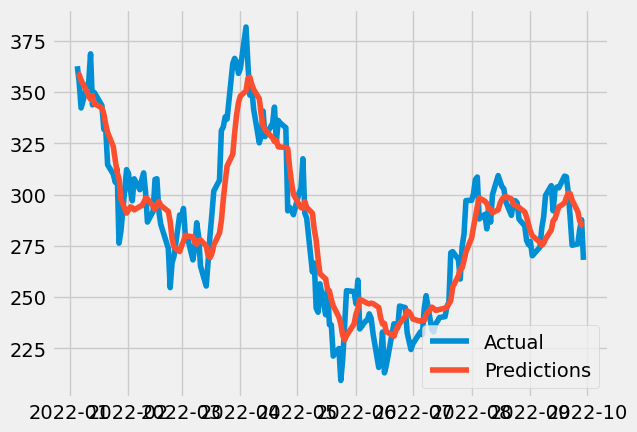

In [37]:
import matplotlib.pyplot as plt
plt.plot(df7[['Close', 'Prediction']])
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.show()

# Phase 2

In [38]:
Diff = df5.iloc[:,0] - df5.iloc[:,1]
Diff

Date
2021-09-30    258.493347
2021-10-01    258.406677
2021-10-04    260.510010
2021-10-05    260.196655
2021-10-06    260.916656
                 ...    
2022-09-23    -22.076447
2022-09-26    -15.785431
2022-09-27     -4.337952
2022-09-28      2.636749
2022-09-29    -16.452393
Length: 252, dtype: float64

In [39]:
Diff = pd.DataFrame(Diff)
Diff

,0
Date,
2021-09-30,258.493347
2021-10-01,258.406677
2021-10-04,260.510010
2021-10-05,260.196655
2021-10-06,260.916656
...,...
2022-09-23,-22.076447
2022-09-26,-15.785431
2022-09-27,-4.337952


In [40]:
df8 = pd.read_csv(r"C:\Users\vella\Desktop\Praju\College\Projects\Final year\Data\Comb_Sent.csv")
df8.head()

,Unnamed: 0,Date,compound_x,compound_y
0,0,2021-09-30,0.213078,0.0000
1,1,2021-10-01,0.224785,0.0000
2,2,2021-10-02,0.255568,0.0000
3,3,2021-10-03,0.257956,-0.0772
4,4,2021-10-04,0.106842,0.0000


In [41]:
df9 = df8.iloc[:,[1,2,3]]
#Converting dates as datetime format
df9.Date = pd.to_datetime(df9.Date)
df9

C:\Users\vella\AppData\Local\Temp\ipykernel_15504\1636560067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9.Date = pd.to_datetime(df9.Date)


,Date,compound_x,compound_y
0,2021-09-30,0.213078,0.0000
1,2021-10-01,0.224785,0.0000
2,2021-10-02,0.255568,0.0000
3,2021-10-03,0.257956,-0.0772
4,2021-10-04,0.106842,0.0000
...,...,...,...
361,2022-09-26,0.170785,0.0000
362,2022-09-27,0.192374,0.0000
363,2022-09-28,0.143788,0.0000
364,2022-09-29,0.065639,0.0000


In [42]:
df9["Day_before"] = df9["Date"] + pd.tseries.offsets.DateOffset(days=1)
df9  = df9.iloc[:,[1,2,3]]
df9

,compound_x,compound_y,Day_before
0,0.213078,0.0000,2021-10-01
1,0.224785,0.0000,2021-10-02
2,0.255568,0.0000,2021-10-03
3,0.257956,-0.0772,2021-10-04
4,0.106842,0.0000,2021-10-05
...,...,...,...
361,0.170785,0.0000,2022-09-27
362,0.192374,0.0000,2022-09-28
363,0.143788,0.0000,2022-09-29
364,0.065639,0.0000,2022-09-30


In [43]:
df9.rename(columns = {'Day_before':'Date'}, inplace = True)
df9

C:\Users\vella\AppData\Local\Temp\ipykernel_15504\187851354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9.rename(columns = {'Day_before':'Date'}, inplace = True)


,compound_x,compound_y,Date
0,0.213078,0.0000,2021-10-01
1,0.224785,0.0000,2021-10-02
2,0.255568,0.0000,2021-10-03
3,0.257956,-0.0772,2021-10-04
4,0.106842,0.0000,2021-10-05
...,...,...,...
361,0.170785,0.0000,2022-09-27
362,0.192374,0.0000,2022-09-28
363,0.143788,0.0000,2022-09-29
364,0.065639,0.0000,2022-09-30


In [44]:
#Converting date column as index
df10 = df9.set_index("Date")

In [45]:
df10

,compound_x,compound_y
Date,,
2021-10-01,0.213078,0.0000
2021-10-02,0.224785,0.0000
2021-10-03,0.255568,0.0000
2021-10-04,0.257956,-0.0772
2021-10-05,0.106842,0.0000
...,...,...
2022-09-27,0.170785,0.0000
2022-09-28,0.192374,0.0000
2022-09-29,0.143788,0.0000


In [46]:
df11 = pd.merge(Diff,df10,left_index = True,right_index = True)
df11

,0,compound_x,compound_y
Date,,,
2021-10-01,258.406677,0.213078,0.0000
2021-10-04,260.510010,0.257956,-0.0772
2021-10-05,260.196655,0.106842,0.0000
2021-10-06,260.916656,0.083851,-0.1308
2021-10-07,264.536682,0.223397,-0.3400
...,...,...,...
2022-09-23,-22.076447,0.079507,0.0000
2022-09-26,-15.785431,0.119892,0.0000
2022-09-27,-4.337952,0.170785,0.0000


In [47]:
df12 = df11[66:]
df12

,0,compound_x,compound_y
Date,,,
2022-01-05,3.603149,0.096747,0.0
2022-01-06,-3.663635,0.119854,0.0
2022-01-07,-13.533752,0.157615,0.0
2022-01-10,2.213562,0.159077,0.0
2022-01-11,6.724030,0.188310,0.0
...,...,...,...
2022-09-23,-22.076447,0.079507,0.0
2022-09-26,-15.785431,0.119892,0.0
2022-09-27,-4.337952,0.170785,0.0


In [48]:
df12.columns = ['Diff','Prev_Tweet_sent','Prev_News_sent']
df12

,Diff,Prev_Tweet_sent,Prev_News_sent
Date,,,
2022-01-05,3.603149,0.096747,0.0
2022-01-06,-3.663635,0.119854,0.0
2022-01-07,-13.533752,0.157615,0.0
2022-01-10,2.213562,0.159077,0.0
2022-01-11,6.724030,0.188310,0.0
...,...,...,...
2022-09-23,-22.076447,0.079507,0.0
2022-09-26,-15.785431,0.119892,0.0
2022-09-27,-4.337952,0.170785,0.0


In [49]:
y= df12.iloc[:,0]
y

Date
2022-01-05     3.603149
2022-01-06    -3.663635
2022-01-07   -13.533752
2022-01-10     2.213562
2022-01-11     6.724030
                ...    
2022-09-23   -22.076447
2022-09-26   -15.785431
2022-09-27    -4.337952
2022-09-28     2.636749
2022-09-29   -16.452393
Name: Diff, Length: 185, dtype: float64

In [50]:
x = df12.iloc[:,[1,2]]
x

,Prev_Tweet_sent,Prev_News_sent
Date,,
2022-01-05,0.096747,0.0
2022-01-06,0.119854,0.0
2022-01-07,0.157615,0.0
2022-01-10,0.159077,0.0
2022-01-11,0.188310,0.0
...,...,...
2022-09-23,0.079507,0.0
2022-09-26,0.119892,0.0
2022-09-27,0.170785,0.0


In [51]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

In [53]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [54]:
y_test = np.array(y_test)

In [55]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [56]:
Diff_pred = reg.predict(x_test)

C:\Users\vella\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [57]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((Diff_pred- y_test)**2)))
rmse

11.457352367769369

In [58]:
x_full = np.array(x)

In [59]:
Pred_diff = reg.predict(x_full)
Pred_diff = pd.DataFrame(Pred_diff)
Pred_diff

C:\Users\vella\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,0
0,-2.509389
1,-1.294523
2,0.690788
3,0.767668
4,2.304640
...,...
180,-3.415799
181,-1.292538
182,1.383227
183,2.518316


In [60]:
Pred_diff.columns = ["Pred_diff"]
Pred_diff

,Pred_diff
0,-2.509389
1,-1.294523
2,0.690788
3,0.767668
4,2.304640
...,...
180,-3.415799
181,-1.292538
182,1.383227
183,2.518316


In [61]:
New_Pred = df7["Prediction"].values + Pred_diff["Pred_diff"].values

In [62]:
New_Pred

array([356.59412651, 357.26910573, 356.54454764, 351.26077078,
       350.38059784, 349.42079604, 350.52044016, 342.83416381,
       346.57987931, 340.55772881, 330.9438221 , 331.7793308 ,
       322.22867287, 313.70034637, 310.15544745, 309.39933756,
       296.28587778, 294.32253315, 294.09203851, 296.45555673,
       292.00816742, 292.79784884, 300.85937715, 291.66171979,
       297.7794779 , 297.70761152, 302.60711973, 295.14936075,
       299.36402652, 303.98804814, 297.84861107, 293.803621  ,
       287.74955771, 287.18612938, 277.48728592, 269.18755842,
       283.36764726, 276.94295546, 283.44127407, 279.40411553,
       283.53600482, 289.62345291, 277.58171905, 277.52667865,
       280.54910956, 277.32692778, 277.19167224, 261.73661827,
       269.21322216, 269.20191887, 282.86000966, 278.08752048,
       288.23960825, 302.41202702, 308.60634281, 319.30357428,
       318.17760002, 332.67118775, 343.72835833, 343.01578392,
       351.9118476 , 353.08781847, 360.62691686, 359.63

In [63]:
df7["New_Pred"] = New_Pred

C:\Users\vella\AppData\Local\Temp\ipykernel_15504\2773255944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7["New_Pred"] = New_Pred


In [64]:
df7

,Close,Prediction,New_Pred
Date,,,
2022-01-05,362.706665,359.103516,356.594127
2022-01-06,354.899994,358.563629,357.269106
2022-01-07,342.320007,355.853760,356.544548
2022-01-10,352.706665,350.493103,351.260771
2022-01-11,354.799988,348.075958,350.380598
...,...,...,...
2022-09-23,275.329987,297.406433,293.990635
2022-09-26,276.010010,291.795441,290.502903
2022-09-27,282.940002,287.277954,288.661181


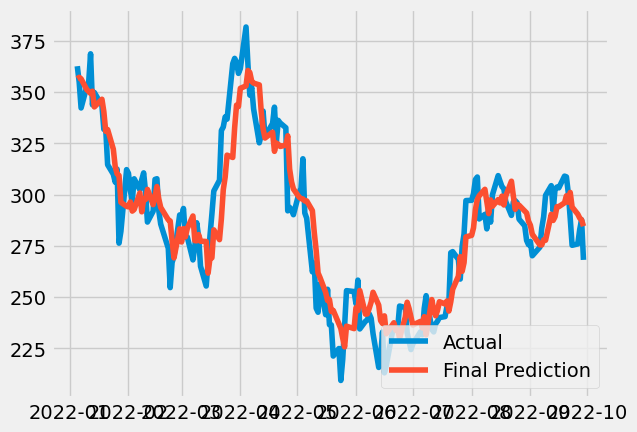

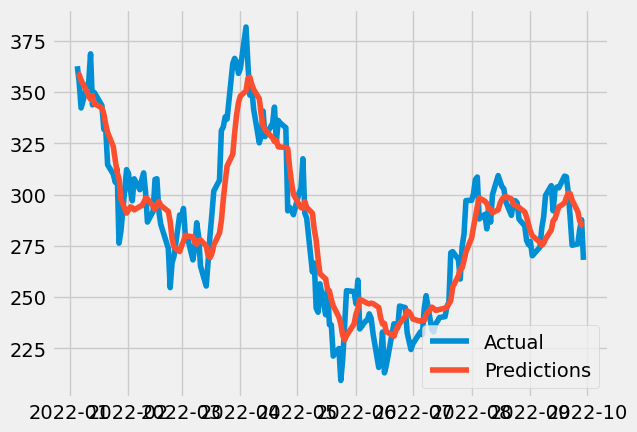

In [65]:
import matplotlib.pyplot as plt
plt.plot(df7[['Close', 'New_Pred']])
plt.legend(['Actual', 'Final Prediction'], loc='lower right')
plt.show()
import matplotlib.pyplot as plt
plt.plot(df7[['Close', 'Prediction']])
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.show()

In [66]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((df7['Close']- df7['New_Pred'])**2)))
rmse

14.634204107641644

In [67]:
def calculate_mape(y_true, y_pred):
    """
    Calculate the Mean Absolute Percentage Error (MAPE) %
    """
    y_pred, y_true = np.array(y_pred), np.array(y_true)
    mape = np.mean(np.abs((y_true-y_pred) / y_true))*100
    return mape

In [68]:
calculate_mape(df7['Close'],df7['New_Pred'])

4.1935111264884295

In [69]:
calculate_mape(df7['Close'],df7['Prediction'])

4.294799090550271